---
## Objective of this Notebook:

In this Notebook, I am going to conduct a data analysis project on the Disaster Data analysis that I take from the EM-DAT website. For this data set, I took the data from 2000 to 2024. This data contains all the disaster that is caused by Hydrological causes in Asia. The steps that are involved in the notebook are -
1. Importing all required packages
2. Data set reading and Basic Data Exploration (Sanity Check)
3. Manipulating the data set to craete another column named Year
4. Connecting the data set with the sqlite3 data base
5. Using SQL queries to query the dataset for specific purpose
6. Using Python Programming to plot from the dataframes I get from SQL queries
7. Reading the Shapefile and Sanity Checks on the Shape file
8. Plot the Countries of South Asia that are highly affected by Hydrological Disasters - Using geopandas and Shape file

---

---
### 1. Importing All Required Packages
---

In [1]:
# 1. Importing Required Packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3
import geopandas as gpd

---
### 2. Data Reading and Basic Data Exploration (Sanity Checks)
---

In [2]:
# 2.1 Connecting Google Colab with Google drive

from google.colab import drive
drive.mount('/content/drive')
print('Google Colab is Connected With Google Drive')

Mounted at /content/drive
Google Colab is Connected With Google Drive


In [3]:
# 2.2 Reading the Data set named 'Disasterdata2000to2024'

data = pd.read_csv('/content/drive/MyDrive/Project_Data_Sets/Disasterdata2000to2024.csv')
data.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0038-PHL,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,4080.0,7219.0,56.514291,"[{""adm2_code"":24275,""adm2_name"":""Agusan Del No...",2004-10-27,2023-09-25
1,2000-0066-PHL,No,nat-hyd-flo-coa,Natural,Hydrological,Flood,Coastal flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":24203,""adm2_name"":""Tawi-tawi""}]",2003-07-01,2023-09-25
2,2000-0082-IDN,No,nat-hyd-mmw-mud,Natural,Hydrological,Mass movement (wet),Mudslide,NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,11600.0,20526.0,56.514291,"[{""adm2_code"":18035,""adm2_name"":""Brebes""}]",2005-07-21,2023-09-25
3,2000-0200-CHN,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,CHN,...,NaN,NaN,NaN,NaN,12000.0,21234.0,56.514291,"[{""adm2_code"":13030,""adm2_name"":""Shenzhen""},{""...",2004-10-27,2023-09-25
4,2000-0235-KAZ,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,KAZ,...,NaN,NaN,NaN,NaN,1500.0,2654.0,56.514291,"[{""adm2_code"":37238,""adm2_name"":""Denisovskiy""}...",2003-07-01,2023-09-25


In [ ]:
# 2.3 The Shape of the dataframe data

print('Number of Rows in the Dataframe is:', data.shape[0])
print('Number of Columns in the Dataframe is:', data.shape[1])

Number of Rows in the Dataframe is: 1650
Number of Columns in the Dataframe is: 46


In [ ]:
# 2.4 Getting the Column Names of the data frame

data.columns.values

array(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion',
       'Region', 'Location', 'Origin', 'Associated Types',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', "Reconstruction Costs ('000 US$)",
       "Reconstruction Costs, Adjusted ('000 US$)",
       "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)",
       "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)",
       'CPI', 'Admin Units', 'Entry Date', 'Last Update'], dtype=object)

In [ ]:
# 2.5 Check Whether the data frame columns have missing value or not

data.isnull().sum()

DisNo.                                          0
Historic                                        0
Classification Key                              0
Disaster Group                                  0
Disaster Subgroup                               0
Disaster Type                                   0
Disaster Subtype                                0
External IDs                                 1365
Event Name                                   1647
ISO                                             0
Country                                         0
Subregion                                       0
Region                                          0
Location                                       10
Origin                                        405
Associated Types                             1124
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
AID Contribution ('000 US$)                  1537


In [ ]:
# 2.6 Checking the Data types of each column

data.dtypes

DisNo.                                        object
Historic                                      object
Classification Key                            object
Disaster Group                                object
Disaster Subgroup                             object
Disaster Type                                 object
Disaster Subtype                              object
External IDs                                  object
Event Name                                    object
ISO                                           object
Country                                       object
Subregion                                     object
Region                                        object
Location                                      object
Origin                                        object
Associated Types                              object
OFDA/BHA Response                             object
Appeal                                        object
Declaration                                   

---
### 3. Manipulating the Data frame called data

* The column 'DisNo.' contains the year, number and country code
* Interested to extract the date from the entries of 'DisNo.' column
* Make a new column called 'Year' that will have the year of disaster
---

In [4]:
# 3. Extracting the Year value from the column 'DisNo.'
# To do this, first I am defining a function that will extract the first part of the entries
# The parts are splitted by '-', so it is possible

def get_year(entry):        # The name of the function is 'get_year'
  return entry.split('-')[0]  # It takes the entries of the 'DisNo.' column

# Craeting a new column called 'Year' and storing the splitted values

data['Year'] = data['DisNo.'].apply(get_year)
data.head() # The column 'Year' creation is successful

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,Year
0,2000-0038-PHL,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,PHL,...,NaN,NaN,NaN,4080.0,7219.0,56.514291,"[{""adm2_code"":24275,""adm2_name"":""Agusan Del No...",2004-10-27,2023-09-25,2000
1,2000-0066-PHL,No,nat-hyd-flo-coa,Natural,Hydrological,Flood,Coastal flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":24203,""adm2_name"":""Tawi-tawi""}]",2003-07-01,2023-09-25,2000
2,2000-0082-IDN,No,nat-hyd-mmw-mud,Natural,Hydrological,Mass movement (wet),Mudslide,NaN,NaN,IDN,...,NaN,NaN,NaN,11600.0,20526.0,56.514291,"[{""adm2_code"":18035,""adm2_name"":""Brebes""}]",2005-07-21,2023-09-25,2000
3,2000-0200-CHN,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,CHN,...,NaN,NaN,NaN,12000.0,21234.0,56.514291,"[{""adm2_code"":13030,""adm2_name"":""Shenzhen""},{""...",2004-10-27,2023-09-25,2000
4,2000-0235-KAZ,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,KAZ,...,NaN,NaN,NaN,1500.0,2654.0,56.514291,"[{""adm2_code"":37238,""adm2_name"":""Denisovskiy""}...",2003-07-01,2023-09-25,2000


---
### 4. Connecting the data frame with sqlite3 database

* Connecting the data with sqlite3 database

---

In [5]:
# 4. Connecting the data frame with sqlite3 database
# Storing in the main memory of the data set

conn = sqlite3.connect(':memory:')
data.to_sql('DISASTER', conn, index = False)

1650

---
### 5. Querying The database table name 'DISASTER' To know Specific Tasks

* Which South Asian Countries are Affected by Disasters.
* Which South Asian Countries faces most affceted person for disaster
* Which Indian Location are affected in India by disaster
* Which Indian Disasters are affected by River Basin
* Count the Number of Disasters in India from 2000 to 2024
* Which Asian Countries Faces this Disasters
---

In [7]:
# 5.1 Select South Asian Countries that are affected by Hydrological Disasters

query1 = 'SELECT DISTINCT(Country), "Disaster Type", "Disaster Subtype", "ISO" \
FROM "DISASTER" WHERE Subregion = "Southern Asia" ;'

result1_df = pd.read_sql_query(query1, conn)
result1_df

,Country,Disaster Type,Disaster Subtype,ISO
0,India,Flood,Flash flood,IND
1,India,Mass movement (wet),Landslide (wet),IND
2,Bangladesh,Flood,Flash flood,BGD
3,India,Flood,Riverine flood,IND
4,Nepal,Flood,Flood (General),NPL
5,Bhutan,Flood,Riverine flood,BTN
6,Iran (Islamic Republic of),Flood,Flash flood,IRN
7,Bangladesh,Flood,Coastal flood,BGD
8,Sri Lanka,Flood,Riverine flood,LKA
9,Iran (Islamic Republic of),Flood,Flood (General),IRN


In [8]:
# 5.2 To Know How Many Peoples are Affected In Southern Asia Countries

query2 = 'SELECT Country, SUM("Total Deaths") AS "Total Deaths", SUM("No. Injured")\
AS "No. Injured", SUM("No. Affected") AS "No. Affected", SUM("No. Homeless") AS  "No. Homeless", \
SUM("Total Affected") AS "Total Affected" FROM "DISASTER" WHERE Subregion = "Southern Asia"\
GROUP BY Country  ORDER BY "Total Affected" DESC ; '

result2_df = pd.read_sql_query(query2, conn)
result2_df

,Country,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected
0,India,30748.0,6345.0,336217462.0,10382947.0,346606754.0
1,Bangladesh,3579.0,21776.0,93930203.0,56938.0,94008917.0
2,Pakistan,8084.0,12256.0,47629900.0,18155.0,47660311.0
3,Iran (Islamic Republic of),1057.0,1733.0,12115880.0,13620.0,12131233.0
4,Sri Lanka,1547.0,312.0,8715980.0,1120763.0,9837055.0
5,Nepal,3925.0,1386.0,4505367.0,99889.0,4606642.0
6,Afghanistan,3729.0,1357.0,880010.0,73655.0,955022.0
7,Maldives,NaN,NaN,3449.0,NaN,3449.0
8,Bhutan,200.0,NaN,NaN,1000.0,1000.0


In [9]:
# 5.3 Which Indian Regions/Locations are Mostly Affected By Hydrological Disasters

query3 = 'SELECT ISO, Location FROM "DISASTER" WHERE Country = "India" LIMIT 10 ;'

result3_df = pd.read_sql_query(query3, conn)
result3_df

,ISO,Location
0,IND,"Yingkiang,Tuting villages (Upper Siang (70051)..."
1,IND,"Moradabad, Bijnor districts (Uttar Pradesh pro..."
2,IND,"Ghatkopar village (Mumbai Suburban district, M..."
3,IND,"East Siang, 70041, West Siang, 70054, Upper Si..."
4,IND,"Katihar, Sitamarhi districts (Bihar province),..."
5,IND,"Pithoragarh, Naini Tal districts (Uttarakhand ..."
6,IND,"Adilabad, Cuddapah, East Godavari, Guntur, Hyd..."
7,IND,"Birbhum, Bardhaman, Murshidabad, Maldah distri..."
8,IND,North 24 Parganas district (West Bengal province)
9,IND,"Silchar city (Cachar district, Assam province)..."


In [10]:
# 5.4 Which Disasters In South Asian is affected by the presence of Nearby River Basins

query4 = 'SELECT Country, ISO, "River Basin" FROM "DISASTER" WHERE \
"River Basin" IS NOT NULL AND Country = "India" ;'

result4_df = pd.read_sql_query(query4, conn)
result4_df

,Country,ISO,River Basin
0,India,IND,"Brahmaputra and its tributaries, Bagmati, Kosi..."
1,India,IND,Godavari
2,India,IND,"Ganges, Kosi, Bagmati, Burhi Ganduk, Hoogly, K..."
3,India,IND,"Ganga-Padma, Brammaputra-Jumuna and the Meghna..."
4,India,IND,Jaikur and Indravati rivers.
...,...,...,...
65,India,IND,Savitri
66,India,IND,Brahmaputra and Barak
67,India,IND,Banas river
68,India,IND,"West Rapti, Ghaghra, Rapti, Rohin, Budhi Rapti..."


In [11]:
# 5.5 Number of Disasters in India in Each year

query5 = 'SELECT Year, COUNT(*) AS Num_Disasters FROM "DISASTER" \
WHERE Country = "India" GROUP BY Year;'

result5_df = pd.read_sql_query(query5, conn)
result5_df

# Set the Indexing to the 'Year' column

indexresult5_df = result5_df.set_index('Year')
indexresult5_df

,Num_Disasters
Year,
2000,9
2001,12
2002,6
2003,7
2004,6
2005,19
2006,17
2007,16
2008,9


In [12]:
# 5.6 Which Countries of Asia is Affected by The Hydrological Disasters

query6 = 'SELECT DISTINCT(Country), Subregion FROM DISASTER;'

result6_df = pd.read_sql_query(query6, conn)
result6_df

,Country,Subregion
0,Philippines,South-eastern Asia
1,Indonesia,South-eastern Asia
2,China,Eastern Asia
3,Kazakhstan,Central Asia
4,Türkiye,Western Asia
5,India,Southern Asia
6,Bangladesh,Southern Asia
7,Thailand,South-eastern Asia
8,Viet Nam,South-eastern Asia
9,Cambodia,South-eastern Asia


---
### 6. Python Programming for Analysis the datasets

* Here the results that I get from SQL are used
* Get the Distribution of the Disaster Type
* Get the Distribution of Disaster Subtype
* Which Countries are affecetd the most by disasters in Southern Asia
* Southern Asia Countries and Number of Total Affected Persons
* Yearwise Disasters in India from 2000 to 2020
---

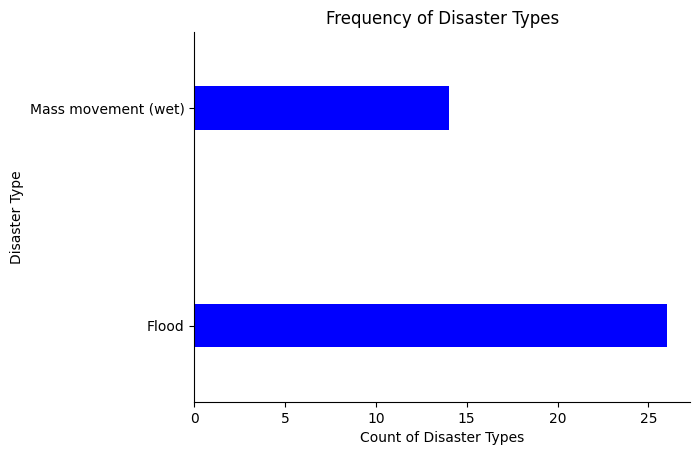

In [17]:
# 6.1 How many Disaster Types are there and what are there frequency

result1_df.groupby('Disaster Type').size().plot(kind = 'barh',width = 0.2, color = 'blue')
plt.gca().spines[['top','right']].set_visible(False)
plt.xlabel('Count of Disaster Types')
plt.title('Frequency of Disaster Types')
plt.show()

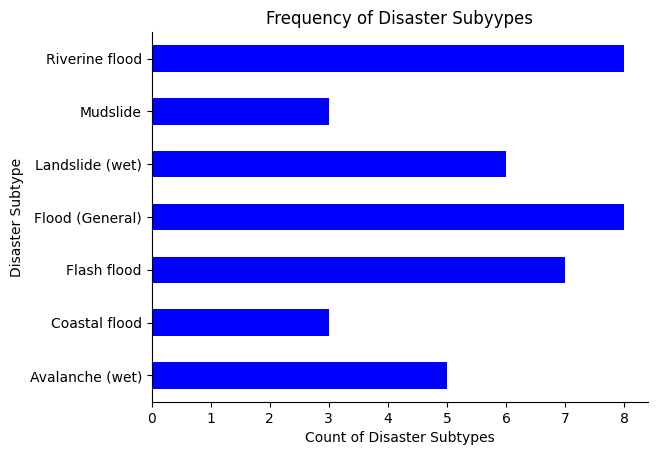

In [18]:
# 6.2 Howmany Disaster Subtypes are there and what are there frequency

result1_df.groupby('Disaster Subtype').size().plot(kind = 'barh', color = 'blue')
plt.gca().spines[['top','right']].set_visible(False)
plt.xlabel('Count of Disaster Subtypes')
plt.title('Frequency of Disaster Subyypes')
plt.show()

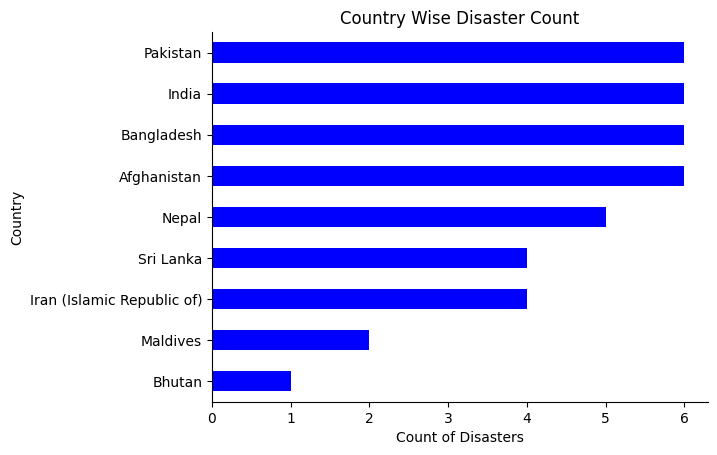

In [19]:
# 6.3 Which South Asian Countries are Affected the most

result1_df.groupby('Country').size().sort_values().plot(kind = 'barh', color = 'blue')
plt.gca().spines[['top','right']].set_visible(False)
plt.xlabel('Count of Disasters')
plt.title('Country Wise Disaster Count')
plt.show()

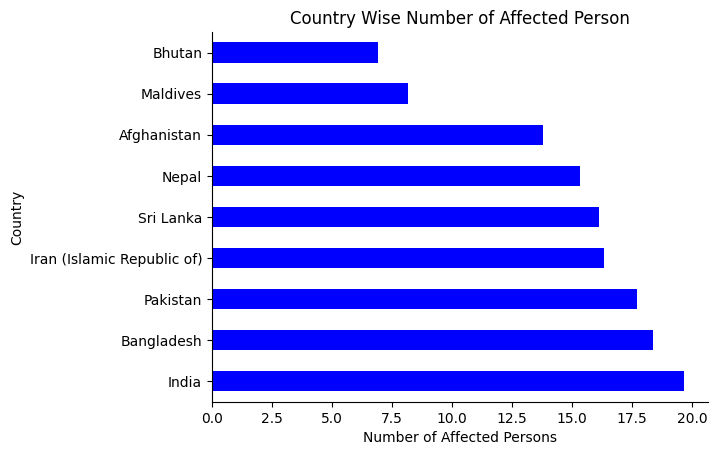

In [20]:
# 6.4 Number of Affected Persons Across South Asian Countries
# The column 'Total Affected' contains high and low values
# So, before plotting it, a quick scaling will be very helpful for meaning ful interpretation of the bar graph

result2_df['Total Affected'] = np.log(result2_df['Total Affected']) # Logarithmic Scaling

result2_df.plot(x = 'Country', y = 'Total Affected', kind = 'barh', color = 'blue', legend = False)
plt.gca().spines[['top','right']].set_visible(False)
plt.xlabel('Number of Affected Persons')
plt.title('Country Wise Number of Affected Person')
plt.show()

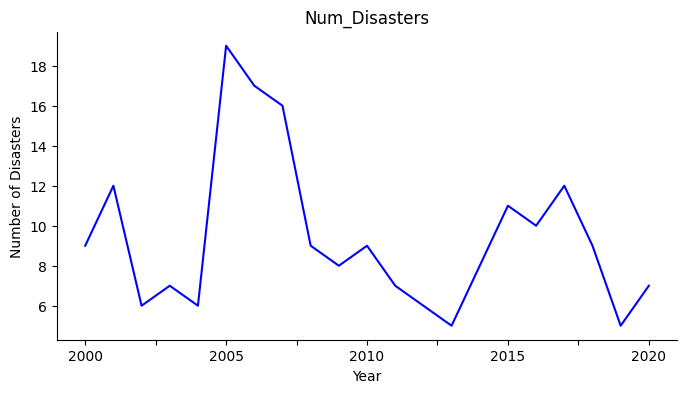

In [21]:
# 6.6 Yearwise Disasters in India from 2000 to 2020

indexresult5_df['Num_Disasters'].plot(kind='line', figsize=(8, 4), color = 'blue', title='Num_Disasters')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('Number of Disasters')
plt.show()

---
### 7. Plotting the Countries of Southern Asia that faces Disasters in World Map

* Use of geopandas library
* Use of World Map Shape File
* The Countries are - India, Bangladesh, Pakistan, Bhutan, Sri Lanka, Maldives, Afganistan, Iran and Nepal


### Objectives:

* Read first five row of the shape file
* Get the shape of the shape file
* Get which column contains the country names (Here the "name" column)
* Get the Unique Country names that exsists in the shape file
---

In [22]:
# 7.1 Reading the 'WorldBoundaries.shp' file using geopandas (gpd)

world = gpd.read_file('/content/drive/MyDrive/Project_Data_Sets/WorldBoundaries.shp')
world.head()

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,None,Adm. by EGY,EGY,Ma'tan al-Sarra,Africa,Northern Africa,None,Ma'tan al-Sarra,"POLYGON ((33.25104 21.99977, 34.15064 21.99603..."
1,CHE,Member State,CHE,Switzerland,Europe,Western Europe,CH,Suisse,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ..."
2,None,UK Territory,GBR,Jersey,Europe,Northern Europe,None,Jersey,"POLYGON ((-2.01500 49.21417, -2.02111 49.17721..."
3,AUT,Member State,AUT,Austria,Europe,Western Europe,AT,Autriche,"POLYGON ((16.94618 48.61907, 16.94333 48.57333..."
4,PRT,Member State,PRT,Portugal,Europe,Southern Europe,PT,Portugal,"POLYGON ((-7.43185 37.25319, -7.41903 37.18055..."


In [23]:
# 7.2 Getting the Shape of the world shapefile

world.shape

(256, 9)

In [24]:
# 7.3 Column Names of the Shapefile
world.columns

Index(['iso3', 'status', 'color_code', 'name', 'continent', 'region',
       'iso_3166_1_', 'french_shor', 'geometry'],
      dtype='object')

In [25]:
# Getting the Country Names from the world shapefile

country_name = world['name'].unique()
country_name

array(["Ma'tan al-Sarra", 'Switzerland', 'Jersey', 'Austria', 'Portugal',
       'Luxembourg', 'Kazakhstan', 'Aruba', 'Holy See',
       'Equatorial Guinea', 'Jamaica', 'Estonia', 'Niger', 'Belize',
       'Morocco', 'Northern Mariana Islands', 'Kuril Islands', 'France',
       'Serbia', 'Uruguay', 'Guam', 'Panama', 'Netherlands Antilles',
       'Algeria', 'Togo', 'Mexico', 'Romania', 'Belarus', 'Ecuador',
       'Sudan', 'United Republic of Tanzania',
       'Micronesia (Federated States of)', 'Antigua & Barbuda', 'Norway',
       'Bangladesh', 'Denmark', 'Belgium', 'Samoa', 'Anguilla', 'Israel',
       'Libyan Arab Jamahiriya', 'New Zealand', 'Madeira Islands',
       'Kenya', 'Oman', 'Republic of Korea', 'Montserrat', 'Liberia',
       'Rwanda', 'Nicaragua', 'Mozambique', 'Uganda', 'Uzbekistan',
       'Ireland', 'Eritrea', 'Malta', 'Finland', 'Turkey', 'Lithuania',
       'Russian Federation', 'Zimbabwe', 'Singapore', 'Argentina',
       'Congo', 'Bahamas', 'Chile', 'Guinea',
    

---
### 8. Denoting the South Asian Countries on the World Map

* Select the Countries first - India, Bangladesh, Bhutan, Sri Lanka, Pakistan, Maldives, Iran, Nepal, Afganistan
* Plot it in the world map
---

In [26]:
# 8.1 Selecting the Asian Countries that have hyfrological disasters from the world shape file

countries = world[world['continent'] == 'Asia']
countries.head()

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
6,KAZ,Member State,KAZ,Kazakhstan,Asia,Central Asia,KZ,Kazakhstan,"POLYGON ((87.34820 49.09262, 87.31638 49.09777..."
16,None,Sovereignty unsettled,RUS,Kuril Islands,Asia,Eastern Asia,None,Kuril Islands,"MULTIPOLYGON (((146.68274 43.70777, 146.66664 ..."
34,BGD,Member State,BGD,Bangladesh,Asia,Southern Asia,BD,Bangladesh,"MULTIPOLYGON (((91.89749 21.47666, 91.88693 21..."
39,ISR,Member State,ISR,Israel,Asia,Western Asia,IL,Israël,"POLYGON ((35.62364 33.24573, 35.63249 33.24637..."
44,OMN,Member State,OMN,Oman,Asia,Western Asia,OM,Oman,"MULTIPOLYGON (((58.84514 20.44319, 58.82417 20..."


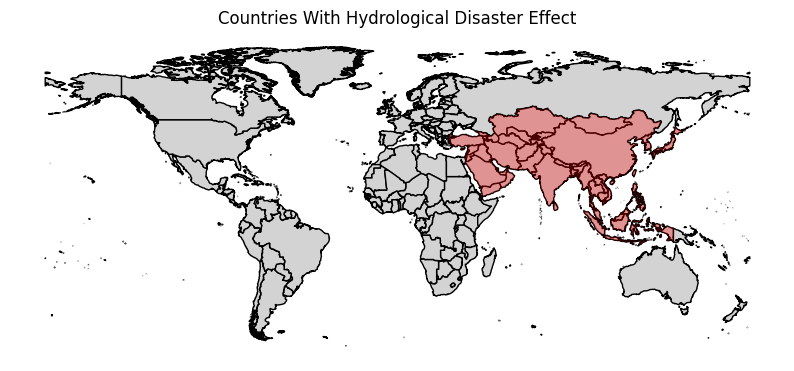

In [27]:
# 8.2 Plotting All Selected Countries in the World Map

fig, ax = plt.subplots(figsize = (10,10))
world.plot(ax = ax, color = 'lightgrey', edgecolor = 'black') # It plots the world map in light grey color
countries.plot(ax = ax, color = 'red', alpha = 0.3) # It plots the selected Countries
plt.title('Countries With Hydrological Disaster Effect')
plt.axis('off')
plt.show()